# HW 10

## SDS348 Spring 2021

### Rose Hedderman EID: rrh2298

**This homework is due on May 3, 2021 at 8am. Submit a pdf file on Gradescope.**

*For all questions, include the Python commands/functions that you used to find your answer. Answers without supporting code will not receive credit. Write full sentences to describe your findings.*

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

In [2]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Question 1: (14 pts)

Tips for food servers at restaurants are a major component of pay (at least in the United States) and may be influenced by many factors. At one restaurant, a food server recorded the following data `tips` on all customers they served during an interval of two and a half months in early 1990. Each record includes the total bill (in dollars), the tip (in dollars), the gender of the server, if patrons were sitting in a smoking area or not, the day and time, and the size of the party.

#### 1.1 (2 pts) The dataset `tips` is from the package `seaborn`. Run the code below to save the dataset in your environment. Take a peek at the first few rows using `.head()`. How many observations are there and how many columns? What does one row represent?

In [3]:
# Import dataset
tips = sns.load_dataset('tips')

In [4]:
# Take a peek
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Find number of observations and number of columns
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


*There are 244 observations where each row represents an individual party.*

#### 1.2 (3 pts) Use the function `.describe()`. Interpret at least one statistic for each variable. You can interpret the same statistics multiple times but remember to include units.

In [6]:
# Interpret statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


*There were 244 total parties. The mean tip amount was $2.99. The largest party had six people. The mininmum bill was $3.07.* 

#### 1.3 (3 pts) Which variables do not appear in the summary table created in 1.2? Describe the missing variables. (*Hint: what type of variables were dropped and what basic statistic do we usually use to describe such type of variables?*)

In [7]:
# describe categorical data: sex
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [8]:
# describe categorical data: smokers
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [9]:
# describe categorical data: day
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
# describe categorical data: time
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

*Categorical variables do not appear in the summary table created in 1.2. Of the observations, there are 157 males and 87 females. There are 93 smoking parties and 151 non-smokers. 87 parties came on Saturday, 76 parties came on Sunday, 62 parties came on Thursday, and 19 parties came on Friday. Also, 68 parties came for lunch while 176 parties came for dinner. The basic statistic used for categorical variables is a proportion. For example, 64% of the parties had a male server.*

#### 1.4 (2 pts) Calculate the tip percentage (amount of tip compared to total bill) using `pandas` functions. Add this percentage as a variable in the data `tips`. Using `pandas` functions similar to `dplyr` functions in `R`, compute the mean and standard deviation and report counts of tip percentage per gender. Does the mean tip percentage seem to differ across gender? What test should we conduct to check for significance?

In [11]:
# add per_tips as new variables
tips["per_tips"] = tips["tip"]/ tips["total_bill"]

# view header of tips
tips.head()

# compute mean and standard dev 
tips.filter(['per_tips'])\
.agg(['mean', 'std'])

#report counts of tip percentage per gender
(tips.filter(['per_tips', 'sex'])
.groupby(['sex'])
.agg(['sum']))

# mean tip percentage per gender
(tips.filter(['per_tips', 'sex'])
.groupby(['sex'])
.agg(['mean']))

,total_bill,tip,sex,smoker,day,time,size,per_tips
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


,per_tips
mean,0.160803
std,0.061072


,per_tips
,sum
sex,
Male,24.751136
Female,14.484694


,per_tips
,mean
sex,
Male,0.157651
Female,0.166491


*The mean tip percentage is higher for female servers than male servers. I will run an independent t-test.* 

#### 1.5 (4 pts) Conduct the appropriate test discussed in the previous question: state the hypotheses, check the assumptions, write a conclusion.

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

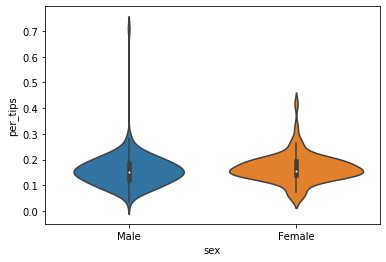

In [12]:
# import stats
import scipy.stats as stats
# check normality through violin plots
sns.violinplot(data = tips, x = "sex", y = "per_tips")
# perform t test
stats.ttest_ind(tips['per_tips'][tips['sex'] == 'Male'],
                tips['per_tips'][tips['sex'] == 'Female'])

*The null hypothesis is that there is not a significant difference between tip percentage between male and female servers. The alternative hypothesis is that there is a significant difference between tip percentage between male and female servers. The distributions appear normal in the violin plot with the exception of the long tail on the male side. The p-value is 0.279 which is very larger therefore the we fail to reject the null hypothesis.*

### Question 2: (11 pts)

In bioinformatics, k-mers refer to all the possible subsequences (of length k) from a read obtained through DNA sequencing. For example, if the DNA sequencing read is "ATCATCATG", then the 3-mers in that read include "ATC" (which occurs twice), "TCA" (which occurs twice), "CAT" (occurs twice), and "ATG" (occurs once). You can read more about k-mers on [Wikipedia](https://en.wikipedia.org/wiki/K-mer).

#### 2.1 (2 pts) Manually find the 4-mers if the DNA sequencing read is "ATCATCATG" and the number of occurences. 

*The 4-mers in ATCATCATG includes:
ATCA (occurs twice), TCAT (occurs twice), CATC (occurs once), CATG (occurs once.*

#### 2.2 (4 pts) Write this sequence in Python as a string and call it `my_seq1`. Write code to select each of the 4-mers found in the previous question (*Hint: use indexing with `[` `:` `]`*). What is the difference between the lowest and highest index? What is the highest index you will start with? How does it relate to the length of the string?

In [13]:
# write the sequence as a python method
my_seq1 = "ATCATCATG"
for i in range(len(my_seq1)-3):
    so = my_seq1[i:i+4]
    print(so)

ATCA
TCAT
CATC
ATCA
TCAT
CATG


*The difference between the lowest and the highest index is 4. The highest index to start with is 4 and the lowest index is 0.* 

#### 2.3 (4 pts) We will create a function that takes a DNA sequence as input and returns a dictionary with all 4-mers present in that string, and the number of occurences for each k-mer. 

The output of the function should be a dictionary that is structured like this:

{"CAG": 2, "AGC": 1, "GCC": 3}

where each key is a k-mer itself (e.g., "ATC") and each value is the number of times that k-mer occurs.

##### a. Define a function called `find_kmer` and taking inputs `(seq,k)`. 
##### b. Create an empty dictionary called `out_dict`. 
##### c. Start a loop. Define the range so that the last value is the last possible index for a k-mer (hint: think about your answer in question 2.2 in relation to the length of the string).
##### d. Check `if` that k-mer already appeared in the dictionary: if yes add 1 to the dictionary value, `else` set the dictionary value of that k-mer to be 1 (hint: this is similar to the loop we created to count how many times a letter appears in a string in WS21).
##### e. Return the dictionary `out_dict`.

#### Test the function to find the 4-mers in the DNA sequence `my_seq1`. Does it match what you found in the question 2.1?

In [14]:
# Define a function called find_kmer and taking inputs (seq,k)
def find_kmer(seq,k):
    # Create an empty dictionary called out_dict
    out_dict = {}
    # Start a loop. Define the range so that the last value is the last possible index for a k-mer
    for i in range(len(seq)-(k-1)):
        mer = seq[i:i+k]
        # Check if that k-mer already appeared in the dictionary
        if mer in out_dict:
            out_dict[mer] += 1
        # if not, set count to 1
        else:
            out_dict[mer] = 1
    # Return the dictionary out_dict
    return out_dict

# run find_kmer on 2.1
find_kmer(my_seq1, 4)

{'ATCA': 2, 'TCAT': 2, 'CATC': 1, 'CATG': 1}

*My find_kmer function works correctly and returns the same output for the "ATCATCATG" sequence.*

#### 2.4 (1 pt) Using the function from the previous question, what are the two most common 3-mers of the string coded below?

In [15]:
my_seq2 = "CAGCCCAATCAGGCTCTACTGCCACTAAACTTACGCAGGATATATTTACGCCGACGTACT"

In [16]:
# apply find_kmer function on my_seq2
find_kmer(my_seq2, 3)

{'CAG': 3,
 'AGC': 1,
 'GCC': 3,
 'CCC': 1,
 'CCA': 2,
 'CAA': 1,
 'AAT': 1,
 'ATC': 1,
 'TCA': 1,
 'AGG': 2,
 'GGC': 1,
 'GCT': 1,
 'CTC': 1,
 'TCT': 1,
 'CTA': 2,
 'TAC': 4,
 'ACT': 4,
 'CTG': 1,
 'TGC': 1,
 'CAC': 1,
 'TAA': 1,
 'AAA': 1,
 'AAC': 1,
 'CTT': 1,
 'TTA': 2,
 'ACG': 3,
 'CGC': 2,
 'GCA': 1,
 'GGA': 1,
 'GAT': 1,
 'ATA': 2,
 'TAT': 2,
 'ATT': 1,
 'TTT': 1,
 'CCG': 1,
 'CGA': 1,
 'GAC': 1,
 'CGT': 1,
 'GTA': 1}

*The strings 'TAC' and 'ACT' have the most occurences at 4.*